# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import re
from sklearn.linear_model import LinearRegression

## Load the datasets

In [2]:
DATASET_PATHS = ['../../data/2015.csv', '../../data/2016.csv', '../../data/2017.csv', '../../data/2018.csv', '../../data/2019.csv']

data_frames = []
all_column_names = set()
for path in DATASET_PATHS:
    data_frame = pd.read_csv(path)
    data_frame['year'] = path.split('/')[-1].split('.')[0]
    data_frame.columns = [re.sub(r'[^\w\s]',' ',column_name).lower() for column_name in data_frame.columns]
    data_frame.columns = [' '.join(column_name.split()) for column_name in data_frame.columns]
    all_column_names.update(data_frame.columns)
    data_frames.append(data_frame)

## Preprocessing
Various datasets have different names for the same columns. We have to unify them.

In [3]:
def check_missing_columns(_data_frames):
    common_column_names = set() # columns that are present in all datasets
    diff_column_names = set() # columns that are missing in some datasets

    for column_name in all_column_names:
        if all([column_name in data_frame.columns for data_frame in _data_frames]):
            common_column_names.add(column_name)
        else:
            diff_column_names.add(column_name)
    return common_column_names, diff_column_names

common_column_names, diff_column_names = check_missing_columns(data_frames)

print('Common columns:')
for column_name in common_column_names:
    print(column_name)
print('\nDifferent columns:')
for column_name in sorted(list(diff_column_names)):
    print(column_name)


Common columns:
generosity
year

Different columns:
country
country or region
dystopia residual
economy gdp per capita
family
freedom
freedom to make life choices
gdp per capita
happiness rank
happiness score
health life expectancy
healthy life expectancy
lower confidence interval
overall rank
perceptions of corruption
region
score
social support
standard error
trust government corruption
upper confidence interval
whisker high
whisker low


In [4]:
mapping = {'country': 'country', 'score' : 'happiness score', 'gdp' : 'gdp per capita', 
'social support' : 'family', 'health' : 'life expectancy', 'freedom' : 'freedom', 'corruption' : 'lack of corruption'}

for data_frame in data_frames:
    for column_name in data_frame.columns:
        for key in mapping:
            if key in str(column_name):
                data_frame.rename(columns={column_name: mapping[key]}, inplace=True)
                break

In [5]:
common_column_names, diff_column_names = check_missing_columns(data_frames)
    
for data_frame in data_frames:
    for column_name in diff_column_names:
        data_frame.drop(columns = column_name, errors='ignore', inplace=True) 


Merge the datasets

In [6]:
data_frame = pd.concat(data_frames)

In [7]:
# show first 5 rows
data_frame.head()

,country,happiness score,gdp per capita,family,life expectancy,freedom,lack of corruption,generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [8]:
# show last 5 rows
data_frame.tail()

,country,happiness score,gdp per capita,family,life expectancy,freedom,lack of corruption,generosity,year
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019
155,South Sudan,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019


Let's look for any missing values. 

In [9]:
data_frame.isnull().sum()

country               0
happiness score       0
gdp per capita        0
family                0
life expectancy       0
freedom               0
lack of corruption    1
generosity            0
year                  0
dtype: int64

We don't have to bother with replacing missing values in this case, we can simply drop the incomplete rows.

In [10]:
data_frame.dropna(inplace=True)

In this scenario, we don't need to worry about replacing missing values; we can just drop the incomplete rows. 

## Data exploration

In [11]:
# find the top 10 countries by happiness score in 2019
data_frame[data_frame['year'] == '2019'].sort_values(by='happiness score', ascending=False).head(10)

,country,happiness score,gdp per capita,family,life expectancy,freedom,lack of corruption,generosity,year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019
5,Switzerland,7.480,1.452,1.526,1.052,0.572,0.343,0.263,2019
6,Sweden,7.343,1.387,1.487,1.009,0.574,0.373,0.267,2019
7,New Zealand,7.307,1.303,1.557,1.026,0.585,0.380,0.330,2019
8,Canada,7.278,1.365,1.505,1.039,0.584,0.308,0.285,2019
9,Austria,7.246,1.376,1.475,1.016,0.532,0.226,0.244,2019


In [12]:
# find the bottom 10 countries by happiness score in 2019
data_frame[data_frame['year'] == '2019'].sort_values(by='happiness score', ascending=True).head(10)

,country,happiness score,gdp per capita,family,life expectancy,freedom,lack of corruption,generosity,year
155,South Sudan,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.077,0.108,2019
149,Malawi,3.410,0.191,0.560,0.495,0.443,0.089,0.218,2019
148,Syria,3.462,0.619,0.378,0.440,0.013,0.141,0.331,2019
147,Botswana,3.488,1.041,1.145,0.538,0.455,0.100,0.025,2019
146,Haiti,3.597,0.323,0.688,0.449,0.026,0.110,0.419,2019


Let's put the top 5 and the bottom 5 countries by happiness score on a single bar chart.

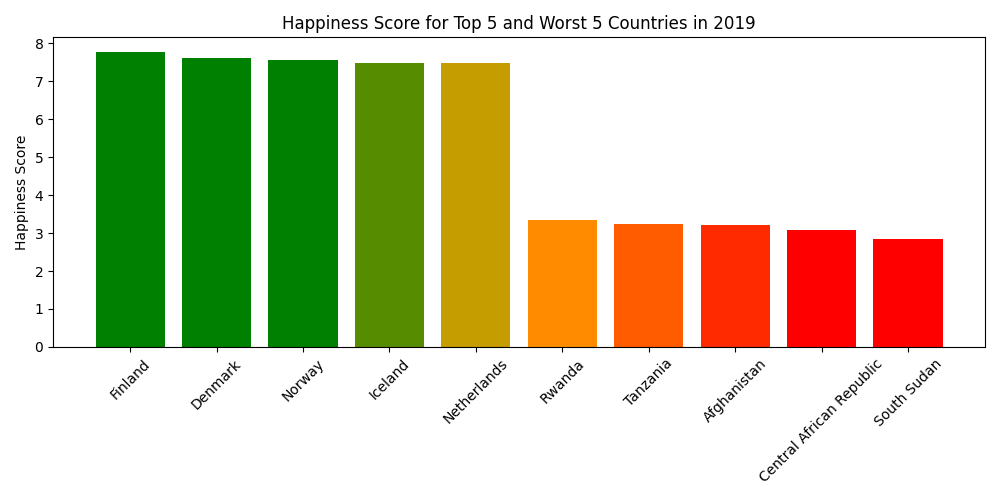

In [13]:
top_5 = data_frame[data_frame['year'] == '2019'].sort_values(by='happiness score', ascending=False).head(5)
worst_5 = data_frame[data_frame['year'] == '2019'].sort_values(by='happiness score', ascending=False).tail(5)

countries = top_5['country'].tolist() + worst_5['country'].tolist()
happiness_scores = top_5['happiness score'].tolist() + worst_5['happiness score'].tolist()

clist = [(0, "red"), (0.125, "red"), (0.5, "orange"), (0.75, "green"), (1, "green")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

plt.figure(figsize=(10, 5))
plt.bar(countries, happiness_scores, color=rvb(np.linspace(1, 0, len(countries))))
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.title('Happiness Score for Top 5 and Worst 5 Countries in 2019')
plt.tight_layout()
plt.show()


Let's look into how different features are related to the happiness score. 

In [14]:
def scatter_plot(data_frame, x_column, y_column, title):
    # use sklearn to fit a linear regression model
    x = data_frame[x_column].values.reshape(-1, 1)
    y = data_frame[y_column].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)

    # plot the data and the regression line
    domain = np.linspace(min(x), max(x), 100)
    predictions = model.predict(domain)

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y)
    plt.plot(domain, predictions, color='red')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    plt.tight_layout()
    # show coefficients of the regression line in format y = mx + b
    plt.legend(['data', 'y = {:.2f}x + {:.2f}'.format(model.coef_[0][0], model.intercept_[0])])
    plt.show()

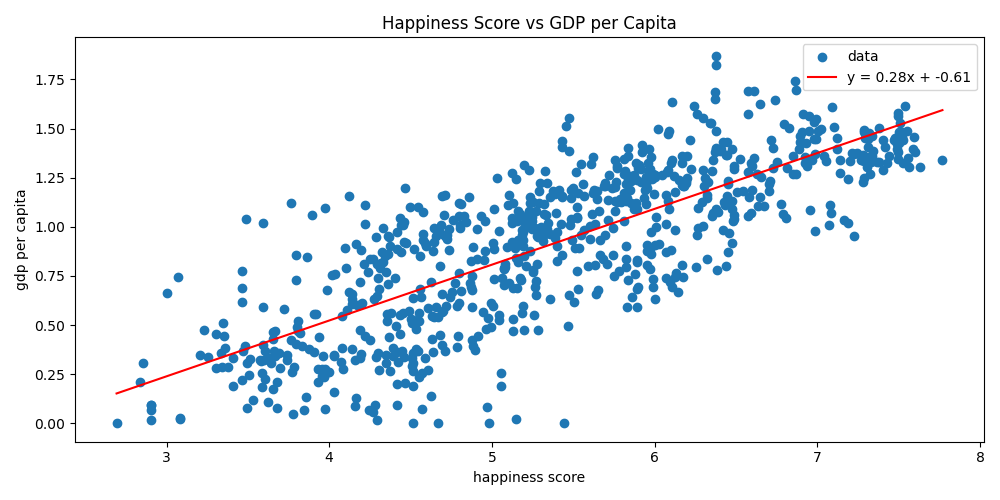

In [15]:
scatter_plot(data_frame, 'happiness score', 'gdp per capita', 'Happiness Score vs GDP per Capita')

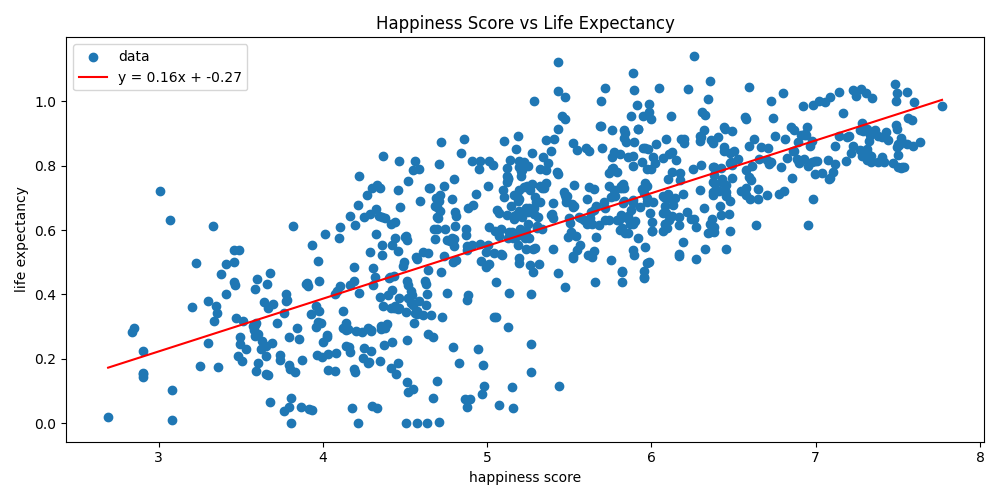

In [16]:
scatter_plot(data_frame, 'happiness score', 'life expectancy', 'Happiness Score vs Life Expectancy')

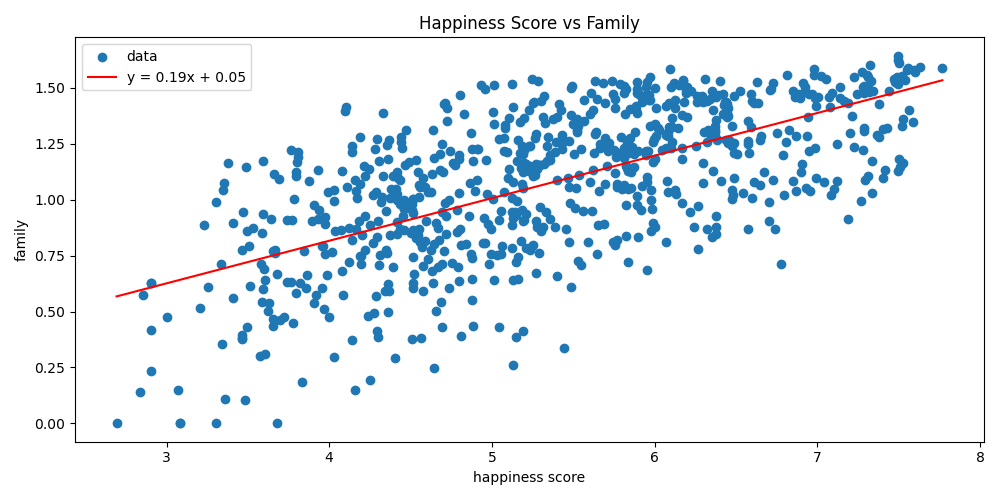

In [17]:
scatter_plot(data_frame, 'happiness score', 'family', 'Happiness Score vs Family')

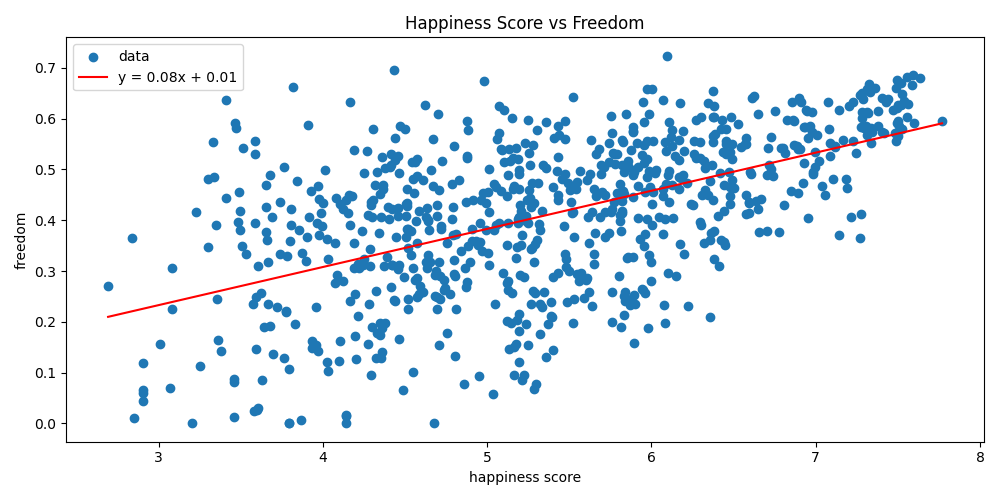

In [18]:
scatter_plot(data_frame, 'happiness score', 'freedom', 'Happiness Score vs Freedom')

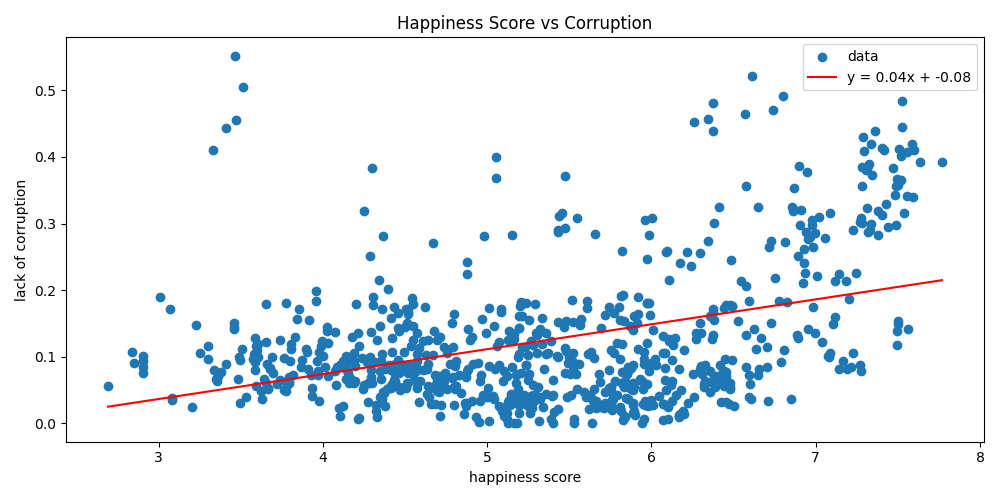

In [19]:
scatter_plot(data_frame, 'happiness score', 'lack of corruption', 'Happiness Score vs Corruption')

There seems to be undenibale correlation between different features and happiness score.

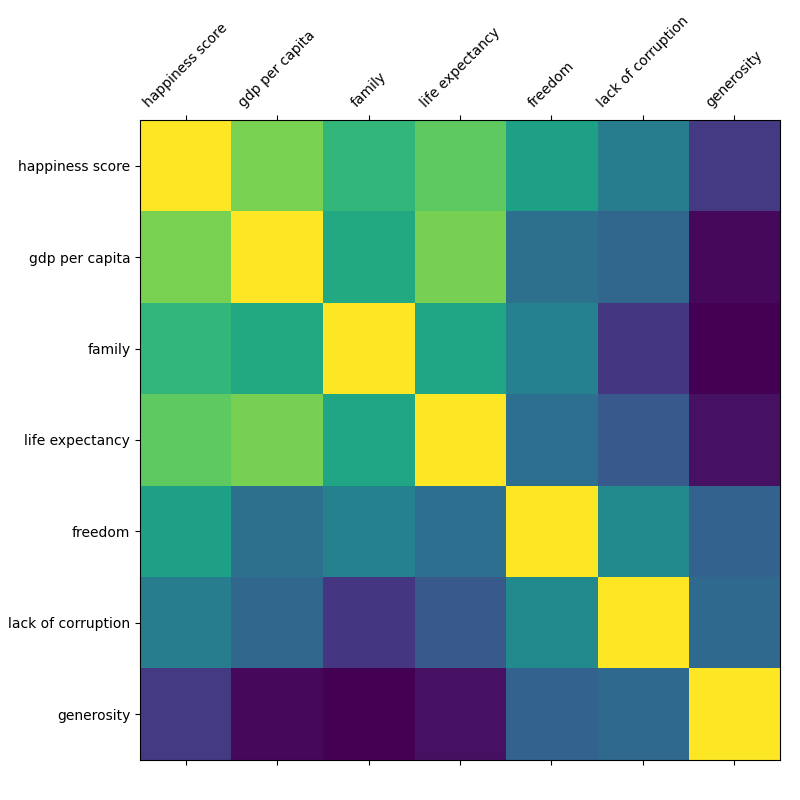

In [20]:
def plot_correlation_matrix(data_frame: pd.DataFrame) -> None:
    """
    Plots a correlation matrix for a given list of columns.

    :param data_frame: the data frame holding the data
    """
    corr = data_frame.corr()
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111,aspect='equal')    
    plt.subplots_adjust(left=0.05, right=1.1, top=0.85, bottom=0.05)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), labels = corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), labels = corr.columns)
    plt.show()
    
plot_correlation_matrix(data_frame)

In [21]:
def sort_by_correlation(data_frame: pd.DataFrame, n: int = -1):
    """
    Sorts the columns of a data frame by correlation with the target column.

    :param df: the data frame holding the data
    :param n: the number of columns to return
    :return: a list of the columns sorted by correlation
    """

    def get_redundant_pairs(data_frame: pd.DataFrame):
        """
        Get diagonal and lower triangular pairs of correlation matrix.

        :param df: the data frame holding the data
        :return: a list of tuples of the redundant pairs
        """
        pairs_to_drop = set()
        cols = data_frame.columns
        for i in range(0, data_frame.shape[1]):
            for j in range(0, i + 1):
                pairs_to_drop.add((cols[i], cols[j]))
        return pairs_to_drop

    au_corr = data_frame.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data_frame)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:n]

print("Top Absolute Correlations")
top_correlations = sort_by_correlation(data_frame[['happiness score','gdp per capita','family','life expectancy','freedom','lack of corruption']])
print(top_correlations)



Top Absolute Correlations
happiness score  gdp per capita        0.789719
gdp per capita   life expectancy       0.787752
happiness score  life expectancy       0.742843
                 family                0.651246
gdp per capita   family                0.592889
family           life expectancy       0.573252
happiness score  freedom               0.553365
freedom          lack of corruption    0.459593
family           freedom               0.419795
happiness score  lack of corruption    0.398418
gdp per capita   freedom               0.345615
life expectancy  freedom               0.341155
gdp per capita   lack of corruption    0.306307
life expectancy  lack of corruption    0.250512
dtype: float64


## Conclusion
The most important factors influencing happiness scores are gdp per capita and life expectancy.